In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
import sklearn.linear_model as linear_model
plt.rcParams.update({'font.size': 18})


In [2]:
chem2017 = pd.read_excel('Eh pH fO2 BA1A 2017 recalc 2-21.xlsx')
chem2017

/Users/mnky9800n/anaconda3/envs/aipipeline/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,DEPT[M],PRESSURE,TEMP,PH,COND,O2,"""EH""","Eh, mV (corrected)",E0,"log(fO2), bars",dissoc H2O,delta H2O-H2,T moved,pH moved,Redox moved,Unnamed: 15,Unnamed: 16,SAL,SP
0,13.22,-0.535044,34.12957,7.674990,0.535000,5.264912,61.71064,249.241110,1.221380,-33.080879,-80.085478,47.004600,33.50594,9.612149,-31.99352,NaN,NaN,0.217899,-1.032044
1,13.23,-0.535044,34.21864,7.669997,0.535000,5.219978,62.04016,249.477463,1.221305,-33.061926,-80.057317,46.995391,45.00000,10.000000,-150.00000,Ellison example,NaN,0.217600,-1.023823
2,13.24,-0.535044,34.30774,7.665003,0.535000,5.175029,62.36979,249.713894,1.221229,-33.042986,-80.029163,46.986176,NaN,NaN,NaN,NaN,NaN,0.217300,-1.015571
3,13.25,-0.535009,34.39703,7.660032,0.534999,5.129851,62.69978,249.950487,1.221154,-33.023917,-80.000968,46.977051,NaN,NaN,NaN,NaN,NaN,0.217000,-1.007323
4,13.26,-0.520950,34.40801,7.673013,0.534700,5.068941,62.60991,249.849132,1.221145,-32.975755,-79.998791,47.023035,NaN,NaN,NaN,NaN,NaN,0.216800,-0.999076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38573,398.95,372.728400,43.19200,9.460000,1.221000,16.470000,-64.60000,113.451168,1.213717,-32.279093,-80.515030,48.235938,NaN,NaN,NaN,NaN,NaN,0.426000,-0.199630
38574,398.96,372.742500,43.19200,9.460000,1.221300,16.466000,-64.67007,113.381098,1.213717,-32.283558,-80.515062,48.231504,NaN,NaN,NaN,NaN,NaN,0.426100,-0.200420
38575,398.97,372.756500,43.19200,9.460000,1.221600,16.462000,-64.73992,113.311248,1.213717,-32.288010,-80.515094,48.227085,NaN,NaN,NaN,NaN,NaN,0.426200,-0.201210
38576,398.98,372.770600,43.19200,9.460000,1.221900,16.458000,-64.80999,113.241178,1.213717,-32.292475,-80.515126,48.222651,NaN,NaN,NaN,NaN,NaN,0.426300,-0.201997


In [3]:
chem2018 = pd.read_excel('Eh pH fO2 BA1A 2018 recalc 2-21.xlsx')
chem2018

/Users/mnky9800n/anaconda3/envs/aipipeline/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,"depth, m",PRESSURE,"temperature, °C",pH,COND(FW),O2%,REDOX,"Eh, mV (corrected)",E0,"log(fO2), bars",dissoc H2O,Unnamed: 11,T moved,pH moved,Redox moved,Unnamed: 15
0,8.996,NaN,NaN,6.795000,NaN,NaN,196.4923,419.722300,NaN,NaN,NaN,NaN,33.50594,9.612149,-31.99352,NaN
1,9.046,2.900659,NaN,6.795170,NaN,56.68019,196.5919,419.821900,NaN,NaN,NaN,NaN,45.00000,10.000000,-150.00000,Ellison example
2,9.096,2.938823,33.50554,6.799098,4.182398,56.68979,196.3673,384.550505,1.221908,-27.853380,-80.554789,52.701409,NaN,NaN,NaN,NaN
3,9.146,2.946671,33.49601,6.805885,4.395324,56.71819,196.3788,384.571974,1.221916,-27.827062,-80.558342,52.731280,NaN,NaN,NaN,NaN
4,9.196,2.871685,33.48883,6.815248,4.498888,56.71642,196.2838,384.484484,1.221922,-27.797050,-80.555577,52.758527,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,399.046,372.868400,43.31741,9.719706,1543.927000,51.41783,-772.1416,-594.221611,1.213611,-76.287301,-80.477941,4.190640,NaN,NaN,NaN,NaN
7802,399.096,372.936000,43.31834,9.719460,1543.791000,51.39703,-772.0930,-594.173984,1.213610,-76.284862,-80.477817,4.192954,NaN,NaN,NaN,NaN
7803,399.146,373.071800,43.32051,9.721888,1544.074000,51.40906,-772.2899,-594.373153,1.213608,-76.286931,-80.477478,4.190546,NaN,NaN,NaN,NaN
7804,399.196,373.064400,43.32323,9.721834,1544.073000,51.42374,-772.1879,-594.273999,1.213606,-76.279695,-80.476650,4.196955,NaN,NaN,NaN,NaN


<Axes: xlabel='depth, m'>

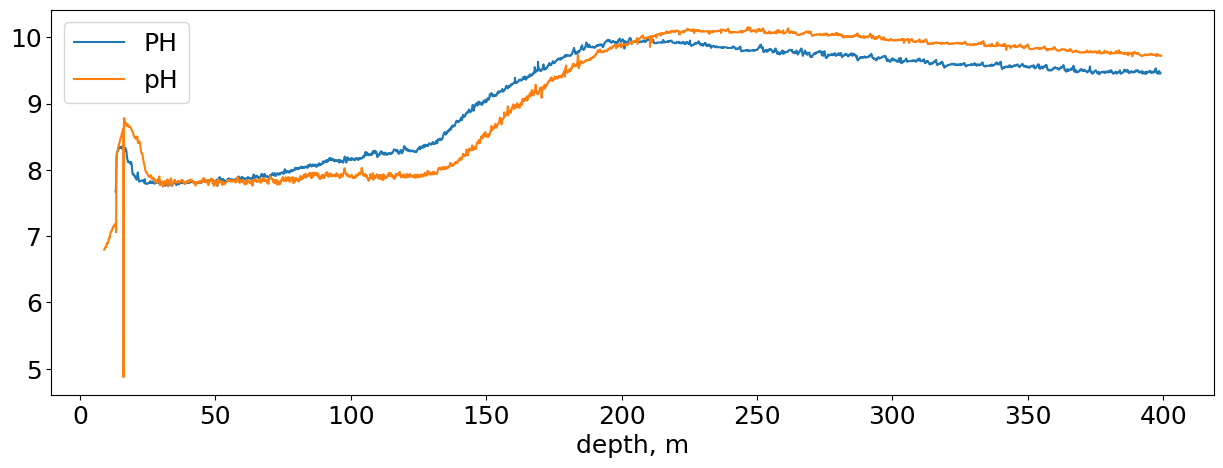

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))

chem2017.plot('DEPT[M]', 'PH', ax=ax)
chem2018.plot('depth, m', 'pH', ax=ax)

<Axes: xlabel='depth, m'>

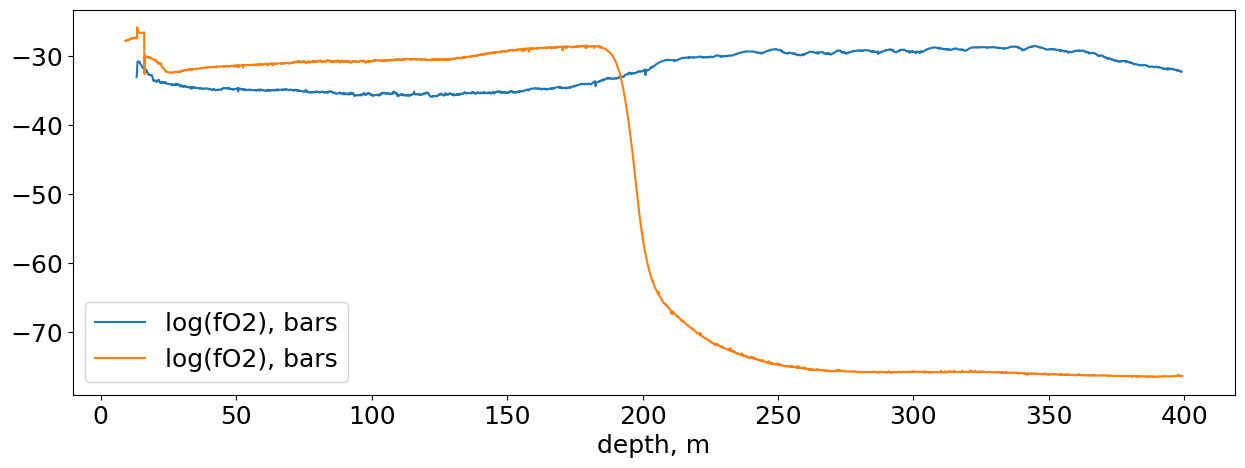

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

chem2017.plot('DEPT[M]', 'log(fO2), bars', ax=ax)
chem2018.plot('depth, m', 'log(fO2), bars', ax=ax)

In [6]:
chem2017['DEPT[M]'].diff()

0         NaN
1        0.01
2        0.01
3        0.01
4        0.01
         ... 
38573    0.01
38574    0.01
38575    0.01
38576    0.01
38577    0.01
Name: DEPT[M], Length: 38578, dtype: float64

In [7]:

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df
    
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')


columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
df188.sort_values(by='arrival_datetime', inplace=True)
df197.sort_values(by='arrival_datetime', inplace=True)
df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
df141 = df141[df141.max_amp > 0.5].copy()
df188 = df188[df188.max_amp > 0.5].copy()
df197 = df197[df197.max_amp > 0.5].copy()
df211 = df211[df211.max_amp > 0.5].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

df141 = df141[df141.depth > 160].copy()
df188 = df188[df188.depth > 160].copy()
df197 = df197[df197.depth > 160].copy()
df211 = df211[df211.depth > 160].copy()

In [8]:
def plot_events(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
    y = data['depth'].values
    s = data['max_amp'].values
    print('amplitude:',s.max())
    print(x.max())
    # ax.scatter(x/x.max(), y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    # ax.scatter(x, y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    ax.scatter(x, y, s=s*10, alpha=0.3, c='purple')
    return x.max()


def plot_hydrophone_depth_horizontal_line(hid, ax):
    hids = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
    for hid in hids:
        depth = config.hydrophone_metadata_141[hid]['depth']
        ax.hlines(y=depth, xmin=-70000, xmax=700000, linestyle='--', color='black', alpha=0.25, zorder=0)

df = pd.read_excel('Dataset_BA1A.xlsx')

geology_columns = ['Re-logged in Southampton, October 2020_Dunite',
       'Re-logged in Southampton, October 2020_Dunite with Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with serpentine',
       'Re-logged in Southampton, October 2020_Dunite with some Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with some serpentine',
       'Re-logged in Southampton, October 2020_Gabbro with harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite with gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some dunite and gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine and gabbro',
       'TOP_DEPTH']
geo_df = df[geology_columns].copy()

plot_data = geo_df.set_index('TOP_DEPTH').transpose()
for n, idx in enumerate(plot_data.index):
    plot_data.loc[idx] = plot_data.loc[idx] * (n + 1)
plot_data.loc['combined'] = plot_data.sum()
plot_data = plot_data.transpose()
plot_data = plot_data['combined'].replace(0, np.nan).ffill().bfill()

x = np.array([0, 1])
y = np.vstack(plot_data.index)
xx, yy = np.meshgrid(x, y)
Z = np.vstack(plot_data.values)

amplitude: 273.18656548251727
3535.391999999993
amplitude: 56.95750129387181
4477.459000000003
amplitude: 71.58338982931284
6094.117998999999
amplitude: 557.2534597217959
1570.7299999999998


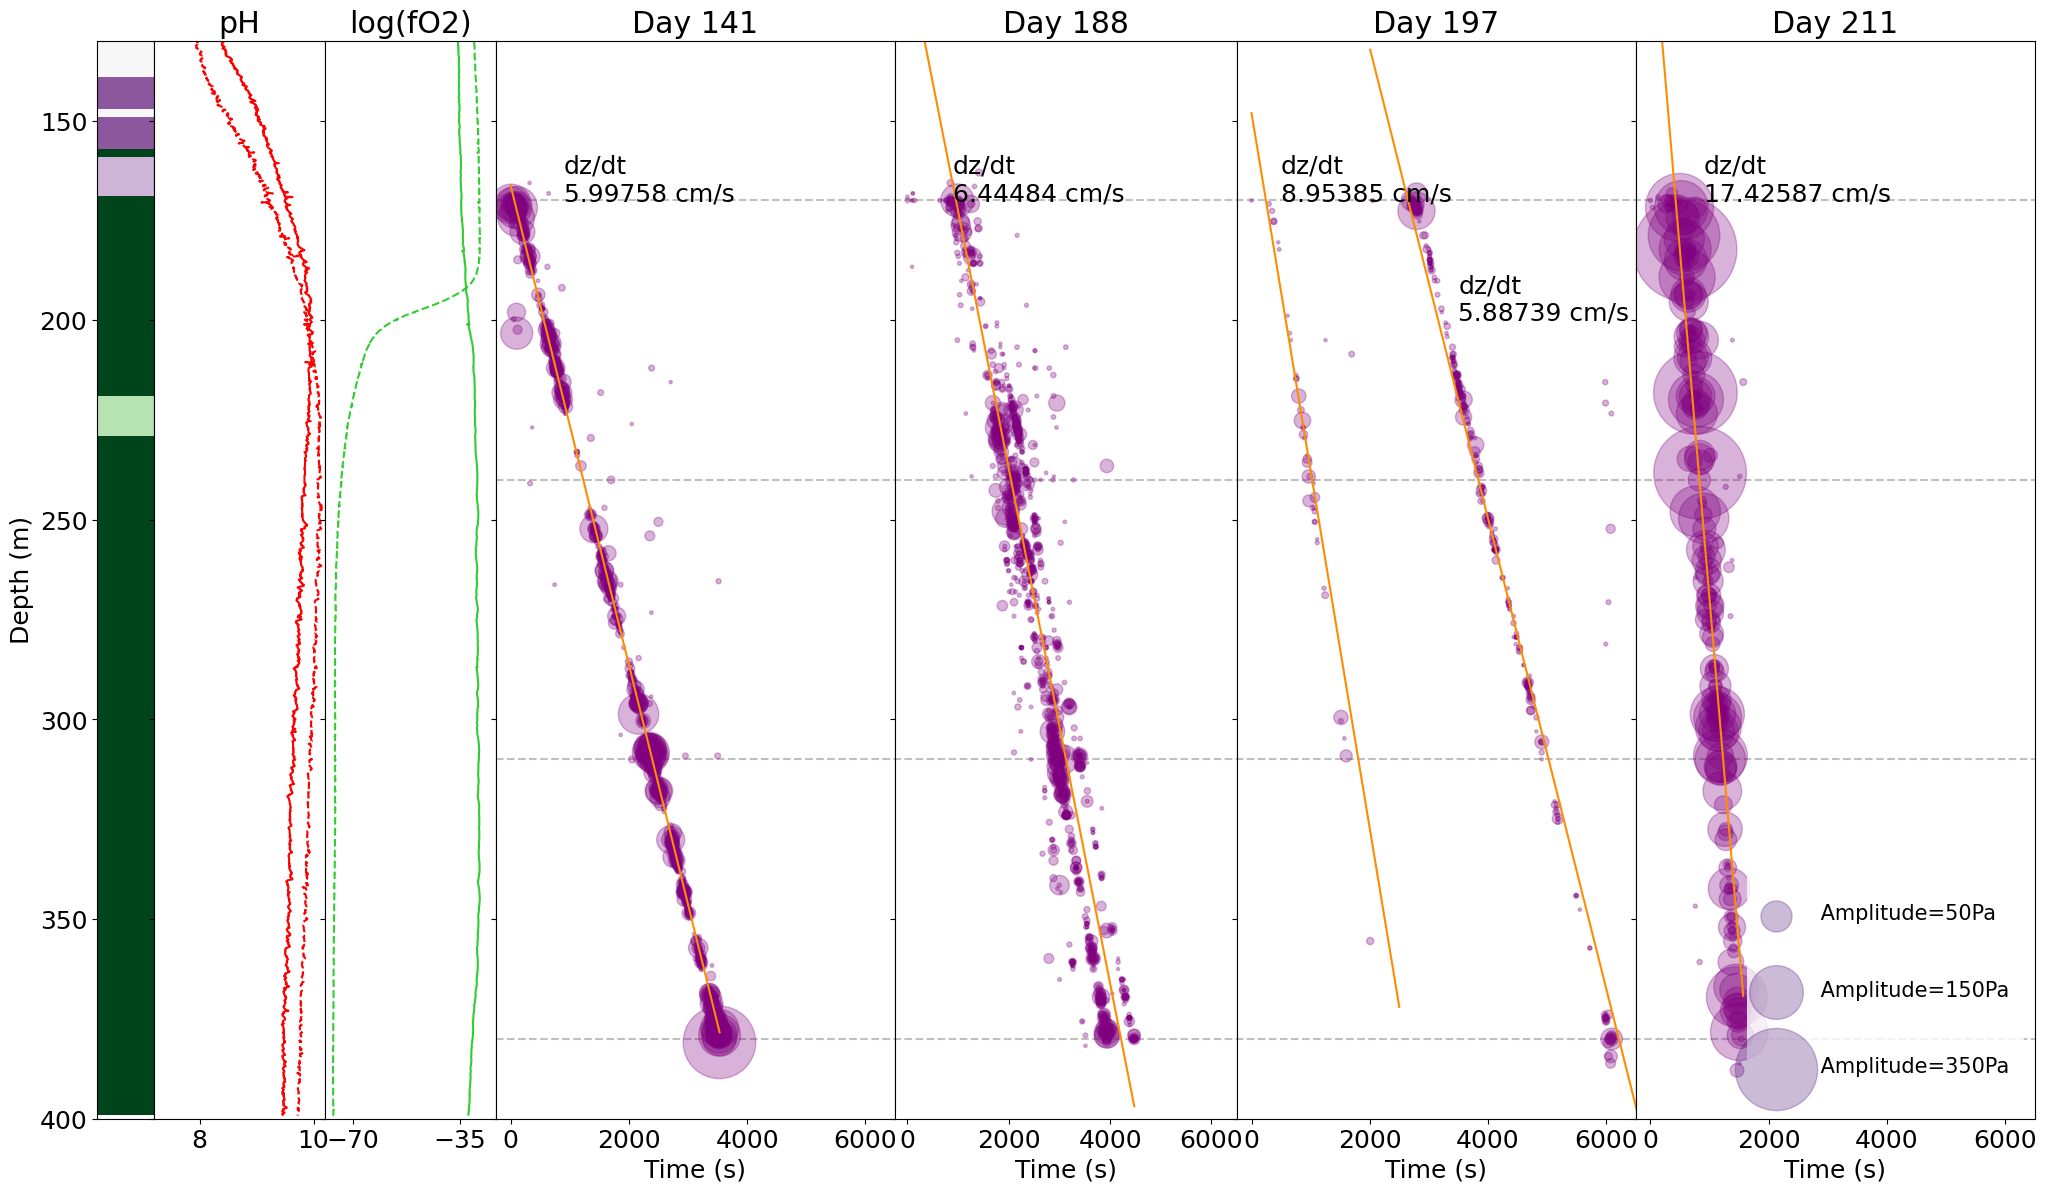

In [9]:
fig = plt.figure(figsize=(25, 14))
mosaic = fig.subplot_mosaic('''
                            apppooobbbbbbbccccccdddddddeeeeeee
                            apppooobbbbbbbccccccdddddddeeeeeee
                            apppooobbbbbbbccccccdddddddeeeeeee
                            apppooobbbbbbbccccccdddddddeeeeeee
                            '''
                           ,sharey=True)
fig.subplots_adjust(wspace=0)

mosaic['p'].plot(chem2017.PH.values, chem2017['DEPT[M]'].values, color='red')
mosaic['p'].plot(chem2018.pH.values, chem2018['depth, m'].values, color='red', linestyle='--')
mosaic['p'].set_title('pH')
mosaic['p'].set_xlim(7.2, 10.2)

# chem2017.plot('PH', 'DEPT[M]', ax=mosaic['p'])
# chem2018.plot('pH', 'depth, m', ax=mosaic['p'])

mosaic['o'].plot(chem2017['log(fO2), bars'].values, chem2017['DEPT[M]'].values, color='limegreen')
mosaic['o'].plot(chem2018['log(fO2), bars'].values, chem2018['depth, m'].values, color='limegreen', linestyle='--')
mosaic['o'].set_title('log(fO2)')
mosaic['o'].set_xticks([-70, -35])

# chem2017.plot('log(fO2), bars', 'DEPT[M]', ax=mosaic['o'])
# chem2018.plot('log(fO2), bars', 'depth, m', ax=mosaic['o'])

mosaic['a'].set_ylim(400, 130)
mosaic['a'].set_xticks([])
mosaic['a'].set_ylabel('Depth (m)')

for ax in 'bcde':
    mosaic[ax].set_xlim(-250, 6500)
    mosaic[ax].set_xlabel('Time (s)')

mosaic['e'].scatter(() , (), s=[50*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=50Pa \n')
mosaic['e'].scatter(() , (), s=[150*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=150Pa \n')
mosaic['e'].scatter(() , (), s=[350*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=350Pa \n')
# mosaic['e'].scatter(() , (), s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
mosaic['e'].legend(edgecolor='None', loc='lower right', fontsize=15)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=mosaic['b'])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=mosaic['c'])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=mosaic['d'])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=mosaic['e'])

mosaic['b'].set_title('Day 141')
mosaic['c'].set_title('Day 188')
mosaic['d'].set_title('Day 197')
mosaic['e'].set_title('Day 211')

##############
# PLOT DATA HERE
#############

mosaic['a'].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='PRGn', shading='auto')

x141 = plot_events(data=df141, ax=mosaic['b'])
x188 = plot_events(data=df188, ax=mosaic['c'])
x197 = plot_events(data=df197, ax=mosaic['d'])
x211 = plot_events(data=df211, ax=mosaic['e'])

def fitline(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values.reshape(-1, 1)
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    modx = np.linspace(0, x.max(), 1000)
    mody = lr.intercept_[0] + lr.coef_[0] * modx
    
    ax.plot(modx, mody, color='darkorange')
    ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 5)} cm/s'
            , x=900, y=170
           ,fontsize=18)

fitline(df141, ax=mosaic['b'])
fitline(df188, ax=mosaic['c'])
fitline(df211, ax=mosaic['e'])

# 197 fitline 1
data = df197[:44].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, 2500, 1000)
ymod = lr.intercept_ + lr.coef_[0] * xmod
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 5)} cm/s'
                 ,x=500, y=170
                 ,fontsize=18)
xstop = x.max()

# 197 fitline 2
data = df197[44:].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(xstop, 7000, 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod - xstop)
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 5)} cm/s'
                 ,x=3500, y=200
                 ,fontsize=18)

fig.savefig('fig4.pdf', bbox_inches='tight')

amplitude: 273.18656548251727
3535.391999999993
amplitude: 56.95750129387181
4477.459000000003
amplitude: 71.58338982931284
6094.117998999999
amplitude: 557.2534597217959
916.2419999999996


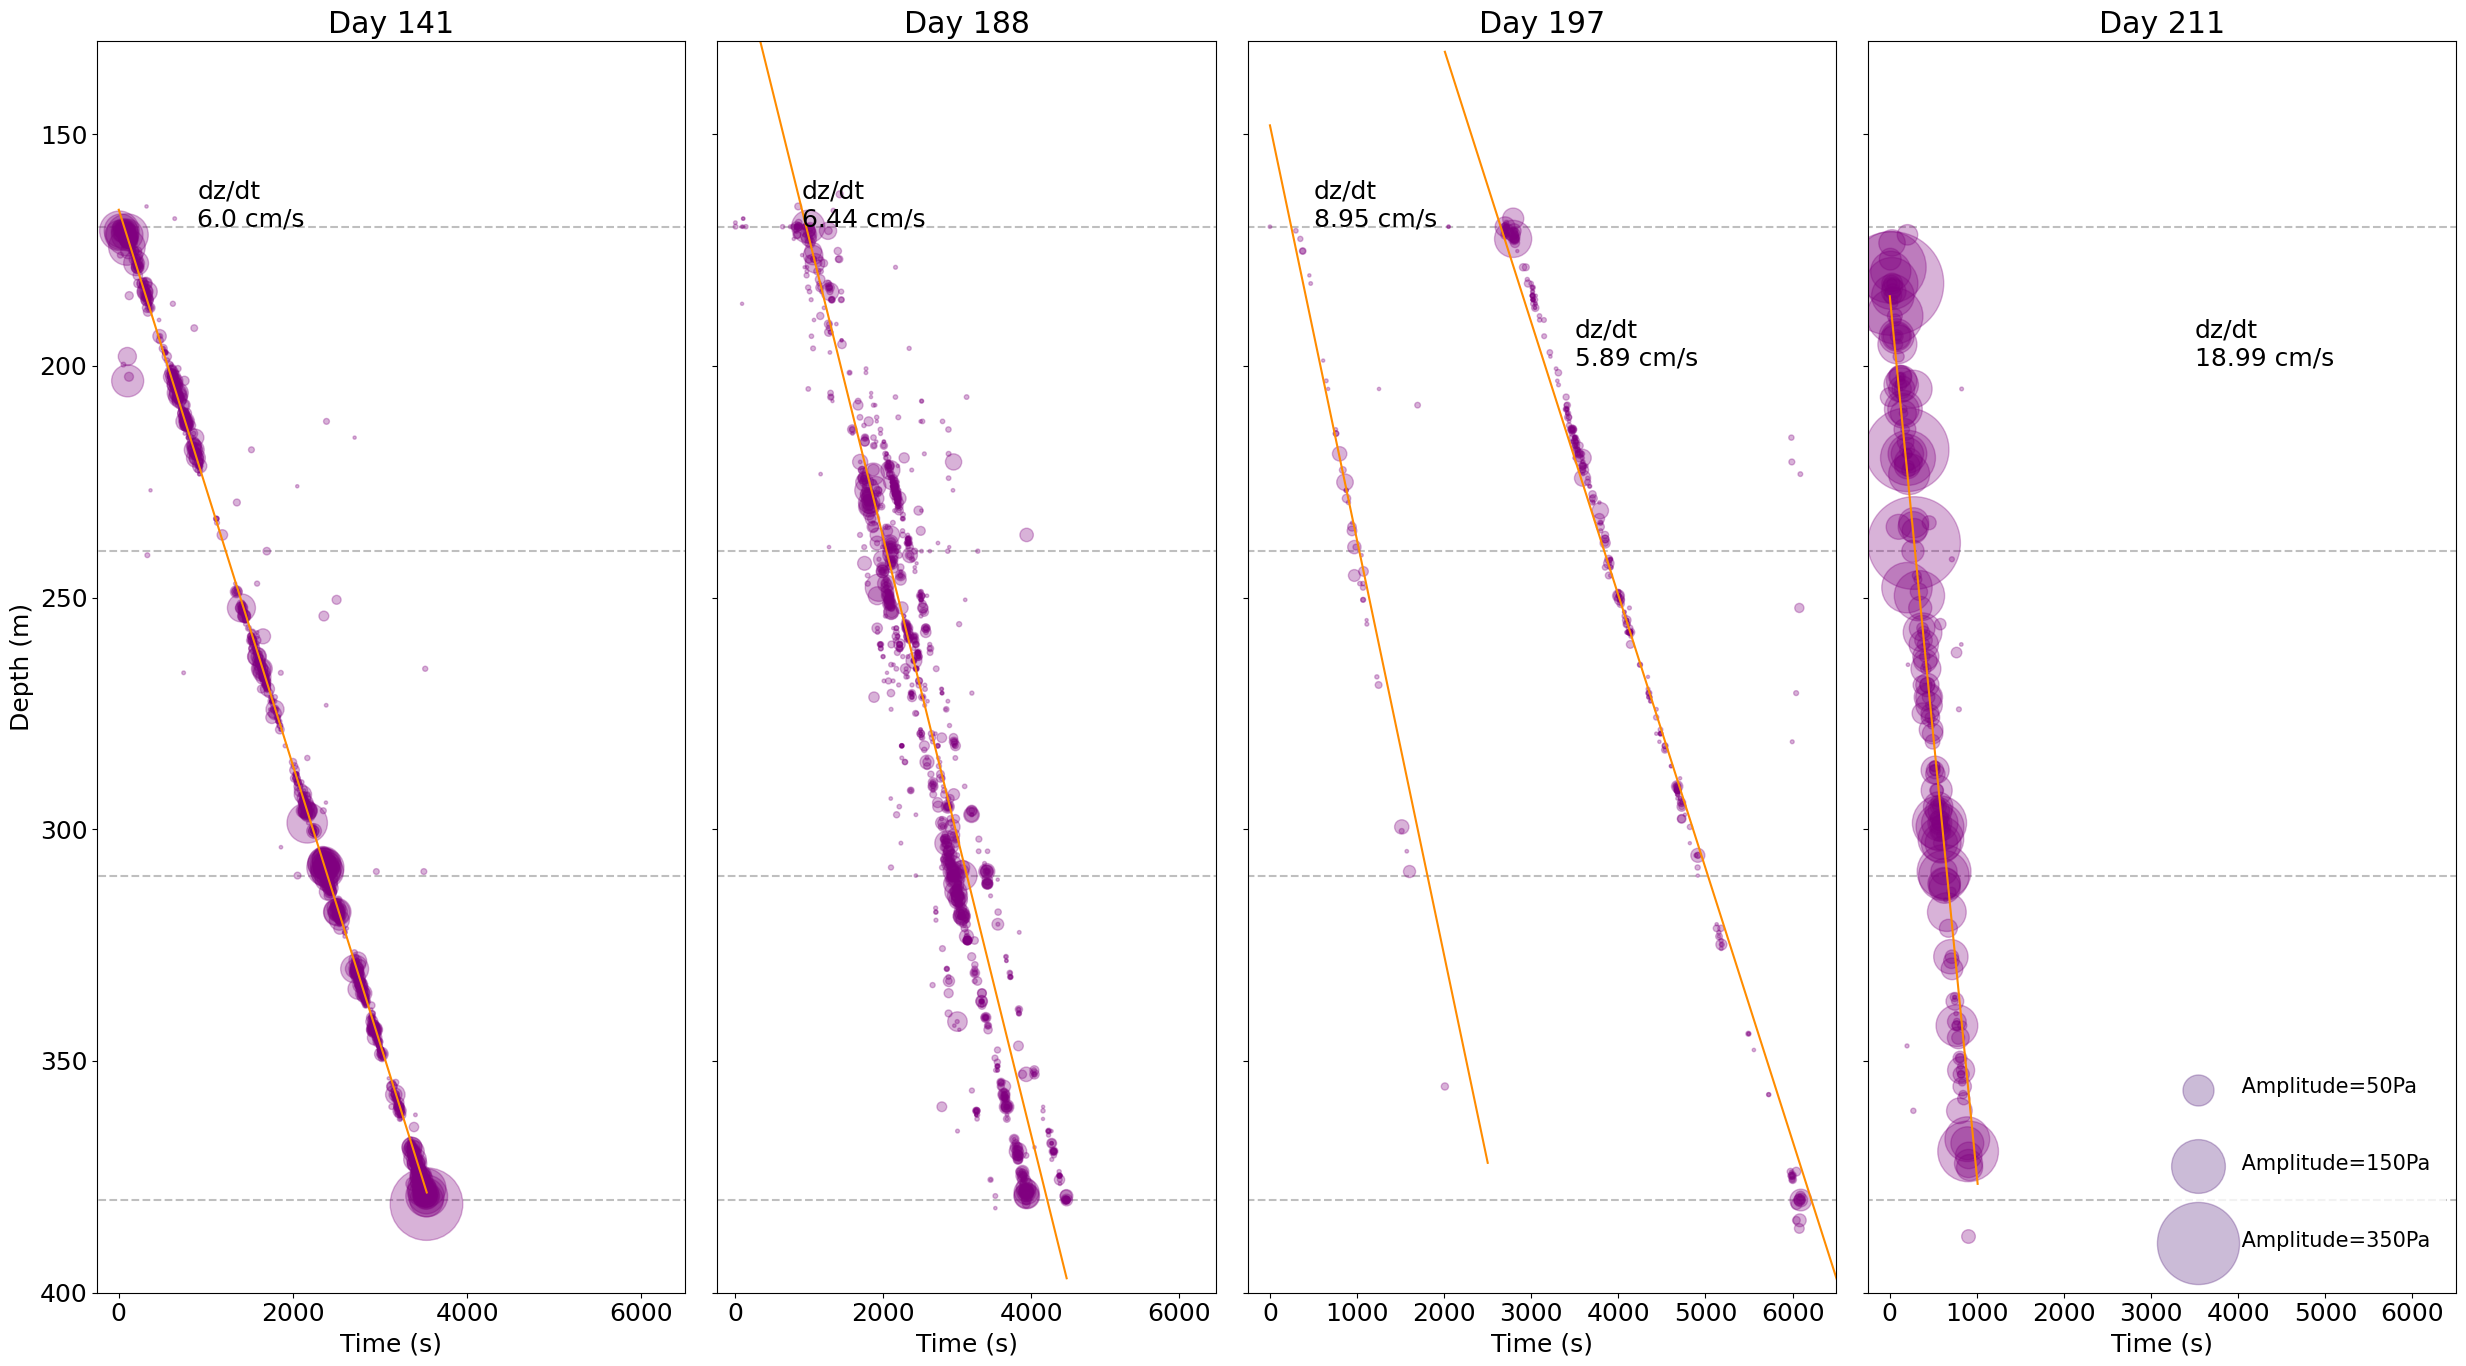

In [10]:
fig = plt.figure(figsize=(25, 14))
mosaic = fig.subplot_mosaic('''
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            '''
                           ,sharey=True)
fig.subplots_adjust(wspace=0)

# mosaic['p'].plot(chem2017.PH.values, chem2017['DEPT[M]'].values, color='red')
# mosaic['p'].plot(chem2018.pH.values, chem2018['depth, m'].values, color='red', linestyle='--')
# mosaic['p'].set_title('pH')
# mosaic['p'].set_xlim(7.2, 10.2)

# # chem2017.plot('PH', 'DEPT[M]', ax=mosaic['p'])
# # chem2018.plot('pH', 'depth, m', ax=mosaic['p'])

# mosaic['o'].plot(chem2017['log(fO2), bars'].values, chem2017['DEPT[M]'].values, color='limegreen')
# mosaic['o'].plot(chem2018['log(fO2), bars'].values, chem2018['depth, m'].values, color='limegreen', linestyle='--')
# mosaic['o'].set_title('log(fO2)')
# mosaic['o'].set_xticks([-70, -35])

# # chem2017.plot('log(fO2), bars', 'DEPT[M]', ax=mosaic['o'])
# # chem2018.plot('log(fO2), bars', 'depth, m', ax=mosaic['o'])

mosaic['b'].set_ylim(400, 130)
mosaic['b'].set_xticks([])
mosaic['b'].set_ylabel('Depth (m)')

for ax in 'bcde':
    mosaic[ax].set_xlim(-250, 6500)
    mosaic[ax].set_xlabel('Time (s)')

mosaic['e'].scatter(() , (), s=[50*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=50Pa \n')
mosaic['e'].scatter(() , (), s=[150*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=150Pa \n')
mosaic['e'].scatter(() , (), s=[350*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=350Pa \n')
# mosaic['e'].scatter(() , (), s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
mosaic['e'].legend(edgecolor='None', loc='lower right', fontsize=15)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=mosaic['b'])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=mosaic['c'])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=mosaic['d'])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=mosaic['e'])

mosaic['b'].set_title('Day 141')
mosaic['c'].set_title('Day 188')
mosaic['d'].set_title('Day 197')
mosaic['e'].set_title('Day 211')

##############
# PLOT DATA HERE
#############

# mosaic['a'].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='PRGn', shading='auto')

x141 = plot_events(data=df141, ax=mosaic['b'])
x188 = plot_events(data=df188, ax=mosaic['c'])
x197 = plot_events(data=df197, ax=mosaic['d'])
x211 = plot_events(data=df211[20:-10], ax=mosaic['e'])

def fitline(data, ax):
    # x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values.reshape(-1, 1)
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    modx = np.linspace(0, x.max(), 1000)
    mody = lr.intercept_[0] + lr.coef_[0] * modx
    
    ax.plot(modx, mody, color='darkorange')
    ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
            , x=900, y=170
           ,fontsize=18)

fitline(df141, ax=mosaic['b'])
fitline(df188, ax=mosaic['c'])
# fitline(df211, ax=mosaic['e'])

# 197 fitline 1
data = df197[:44].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, 2500, 1000)
ymod = lr.intercept_ + lr.coef_[0] * xmod
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=500, y=170
                 ,fontsize=18)
xstop = x.max()

# 197 fitline 2
data = df197[44:].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(xstop, 7000, 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod - xstop)
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=3500, y=200
                 ,fontsize=18)

# 211 fitline
data = df211[20:].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, x.max(), 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod)
mosaic['e'].plot(xmod, ymod, color='darkorange')
mosaic['e'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=3500, y=200
                 ,fontsize=18)

mosaic['b'].set_xticks(np.arange(0, 6001, 2000))
# mosaic['b'].set_xlim(-50, 4500)

fig.tight_layout()
fig.savefig('fig4.pdf', bbox_inches='tight')

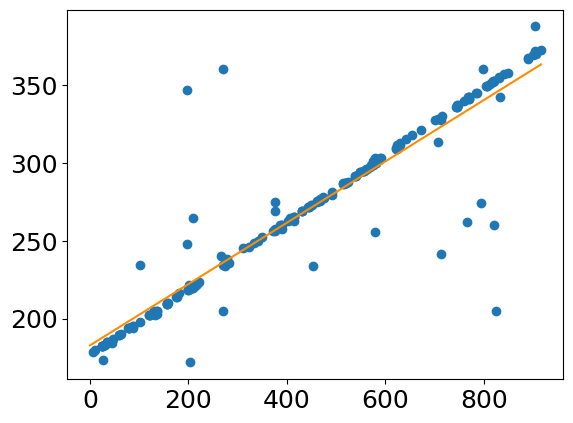

In [11]:
fig, ax = plt.subplots()

data = df211[20:-10].copy()

ax.scatter(data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)[2:]
        ,data['depth'][2:]
          )

x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
# xmod = np.linspace(xstop, 7000, 1000)
modx = np.linspace(0, x.max(), 1000)
ymod = lr.intercept_ + lr.coef_[0] * (modx)
ax.plot(modx, ymod, color='darkorange')
# ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
#                  ,x=3500, y=200
#                  ,fontsize=18)

In [12]:
df211

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time
3,3,170.000,0.000,2,3,18107.940845,2019-07-30 22:34:48.976999+00:00,2019-07-30 22:34:49.016999+00:00,-0.040,0.983393,5.528574,2019-07-30 22:34:48.976999+00:00,2019-07-30T22:34:48.976999Z
5,5,171.750,1.750,2,3,18107.941234,2019-07-30 22:35:22.659999+00:00,2019-07-30 22:35:22.697999+00:00,-0.038,0.995067,7.371410,2019-07-30 22:35:22.659999+00:00,2019-07-30T22:35:22.658999Z
8,8,169.125,-0.875,2,3,18107.942301,2019-07-30 22:36:54.776999+00:00,2019-07-30 22:36:54.817999+00:00,-0.041,0.905706,3.316398,2019-07-30 22:36:54.776999+00:00,2019-07-30T22:36:54.777499Z
9,9,170.875,0.875,2,5,18107.944070,2019-07-30 22:39:27.605999+00:00,2019-07-30 22:39:27.618999+00:00,-0.013,16.758552,50.554140,2019-07-30 22:39:27.605999+00:00,2019-07-30T22:39:27.605499Z
11,11,170.000,0.000,2,3,18107.944081,2019-07-30 22:39:28.615999+00:00,2019-07-30 22:39:28.655999+00:00,-0.040,7.777374,61.415570,2019-07-30 22:39:28.615999+00:00,2019-07-30T22:39:28.615999Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,304,239.125,69.125,5,2,18107.958338,2019-07-30 23:00:00.376999+00:00,2019-07-30 23:00:00.389999+00:00,-0.013,0.906981,9.759211,2019-07-30 23:00:00.376999+00:00,2019-07-30T23:00:00.337499Z
305,305,379.125,69.125,5,4,18107.958463,2019-07-30 23:00:11.177999+00:00,2019-07-30 23:00:11.216999+00:00,-0.039,36.376443,111.969394,2019-07-30 23:00:11.177999+00:00,2019-07-30T23:00:11.138499Z
307,307,380.000,70.000,5,4,18107.958647,2019-07-30 23:00:27.113999+00:00,2019-07-30 23:00:27.153999+00:00,-0.040,1.537374,20.454057,2019-07-30 23:00:27.113999+00:00,2019-07-30T23:00:27.073999Z
311,311,379.125,69.125,5,4,18107.958868,2019-07-30 23:00:46.209999+00:00,2019-07-30 23:00:46.248999+00:00,-0.039,24.298655,126.494161,2019-07-30 23:00:46.209999+00:00,2019-07-30T23:00:46.170499Z


r2:0.9895261096576752
velocity:0.05997575707042699
r2:0.8830394606320884
velocity:0.06444835980525339
r2:0.7884332914981451
velocity:0.08953853493643124
r2:0.8710164871194478
velocity:0.058873873773322226
r2:0.8178300179542021
velocity:0.18989893549280373


(90.0, 410.0)

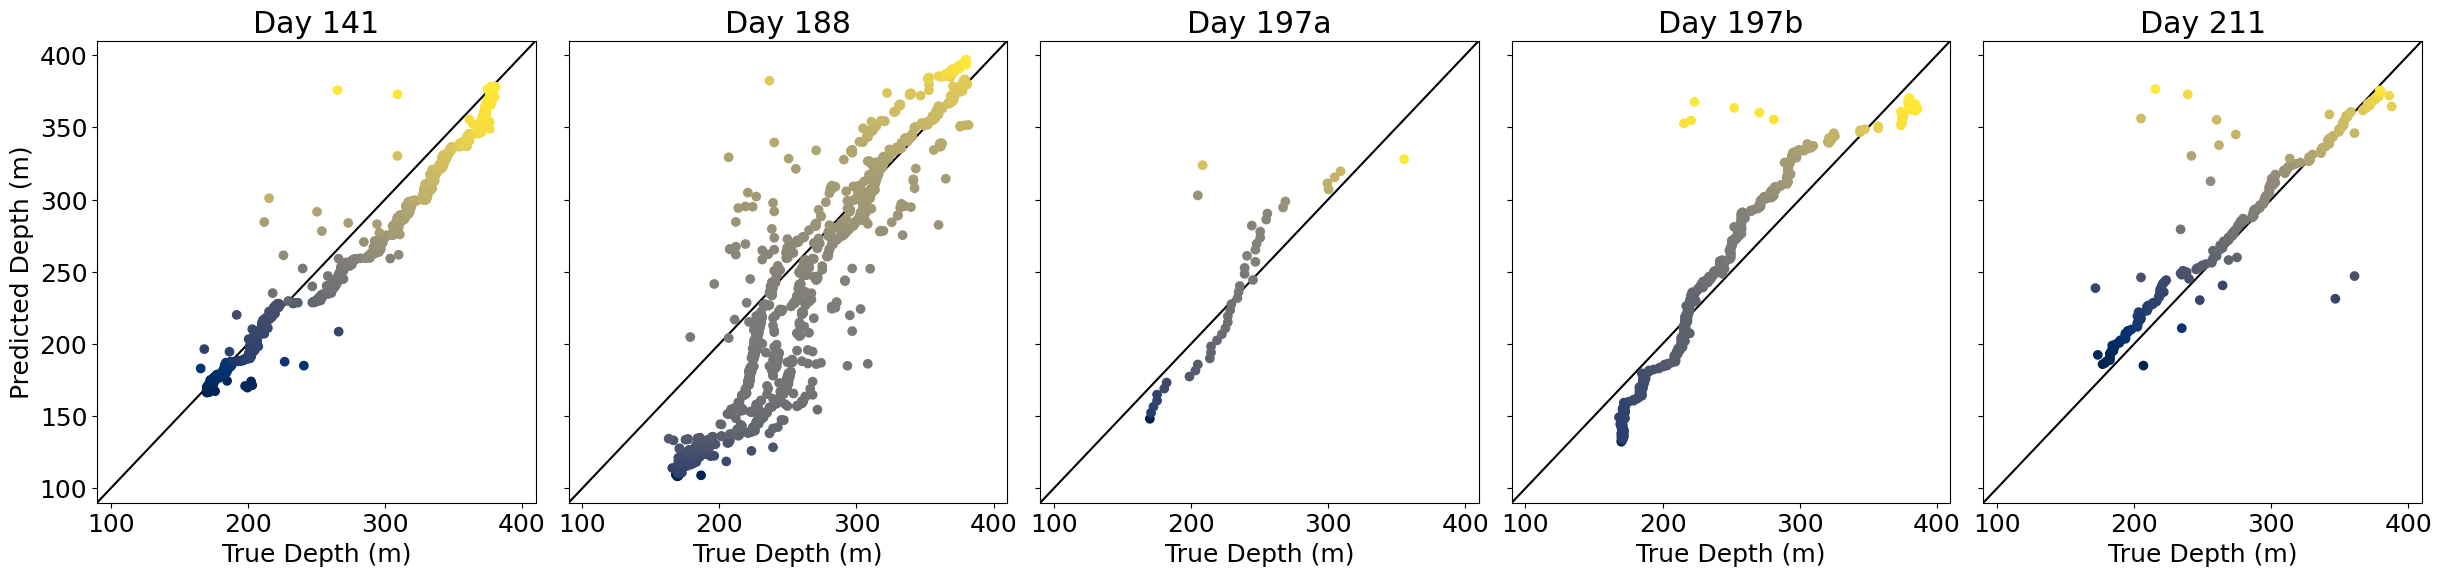

In [13]:
AMPS = []
VELS = []

fig = plt.figure(figsize=(30, 6))
mosaic = fig.subplot_mosaic('''
                            abcde
                            '''
                           ,sharey=True
                           ,sharex=True)
fig.subplots_adjust(wspace=0.075)

def plot_residuals(data, ax, **kwargs):
    data = data.copy()
    x = data['arrival_datetime'].diff()
    x = x.apply(lambda t: t.total_seconds())
    x = x.fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    print(f'r2:{lr.score(x, y)}')
    
    xmod = np.linspace(0, x.flatten().max(), x.flatten().shape[0])
    ymod = lr.intercept_ + lr.coef_[0] * xmod
    print(f'velocity:{lr.coef_[0]}')
    VELS.append(lr.coef_[0])

    cbar = ax.scatter(y, ymod, c=x, cmap='cividis')
    ax.plot((0, 500), (0, 500), color='black', zorder=0)
    return xmod, ymod

xymod141 = plot_residuals(data=df141, ax=mosaic['a'])
xymod188 = plot_residuals(data=df188, ax=mosaic['b'])
xymod197a = plot_residuals(data=df197[:44], ax=mosaic['c'])
xymod197b = plot_residuals(data=df197[44:], ax=mosaic['d'])
xymod211 = plot_residuals(data=df211[20:], ax=mosaic['e'])

mosaic['a'].set_ylabel('Predicted Depth (m)')
mosaic['a'].set_xlabel('True Depth (m)')
mosaic['b'].set_xlabel('True Depth (m)')
mosaic['c'].set_xlabel('True Depth (m)')
mosaic['d'].set_xlabel('True Depth (m)')
mosaic['e'].set_xlabel('True Depth (m)')
mosaic['a'].set_title('Day 141')
mosaic['b'].set_title('Day 188')
mosaic['c'].set_title('Day 197a')
mosaic['d'].set_title('Day 197b')
mosaic['e'].set_title('Day 211')
mosaic['a'].set_ylim(90, 410)
mosaic['a'].set_xlim(90, 410)
# plt.tight_layout()
# fig.savefig('fig5.pdf', bbox_inches='tight')

In [14]:
import obspy
df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)

20     2019-05-21 07:38:53.972000
26     2019-05-21 07:38:57.606500
32     2019-05-21 07:39:00.079000
34     2019-05-21 07:39:00.925500
40     2019-05-21 07:39:07.064500
                  ...            
2236   2019-05-21 08:37:46.246500
2237   2019-05-21 08:37:46.847000
2238   2019-05-21 08:37:47.518000
2239   2019-05-21 08:37:48.472500
2240   2019-05-21 08:37:49.325500
Name: origin_time, Length: 1630, dtype: datetime64[ns]

Text(0.5, 1.0, 'day 141')

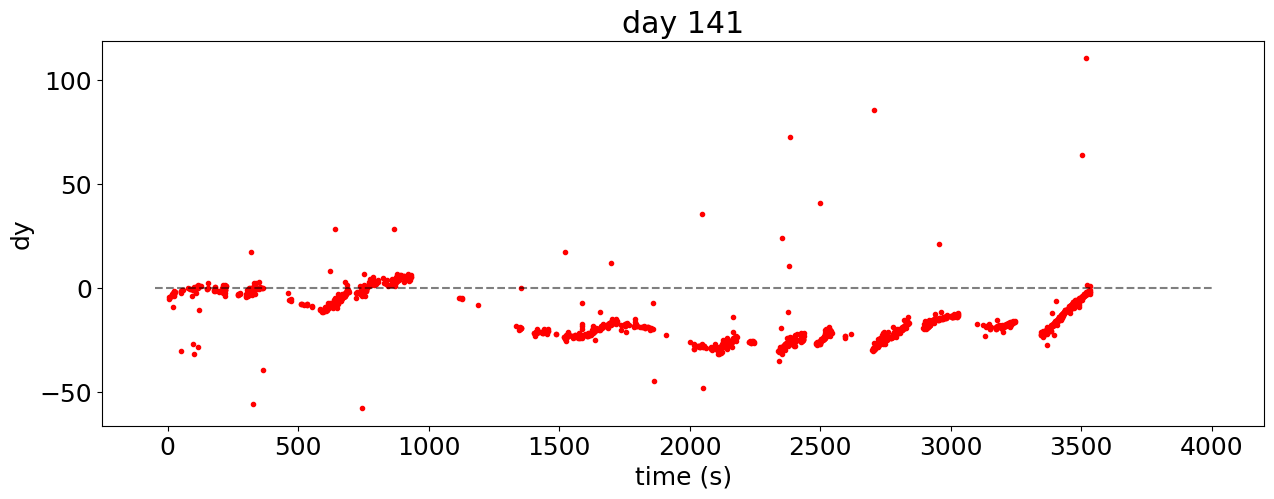

In [20]:
x = xymod141[0]
y = xymod141[1]

fig, ax = plt.subplots(figsize=(15, 5))

dt = df141.arrival_datetime.diff()[1:].apply(lambda t: t.total_seconds())
dy = y[1:] - df141.depth.values[1:]

ax.plot(np.cumsum(dt), dy, marker='.', linestyle='', color='red')
ax.plot((-50, 4000), (0, 0), color='black', alpha=0.5, linestyle='--')
# ax.set_xlim(-50, 4000)
# ax.set_ylim(100, -50)
# ax.set_ylabel('dy/dt (cm s^-1)')
ax.set_ylabel('dy')
ax.set_xlabel('time (s)')
ax.set_title('day 141')

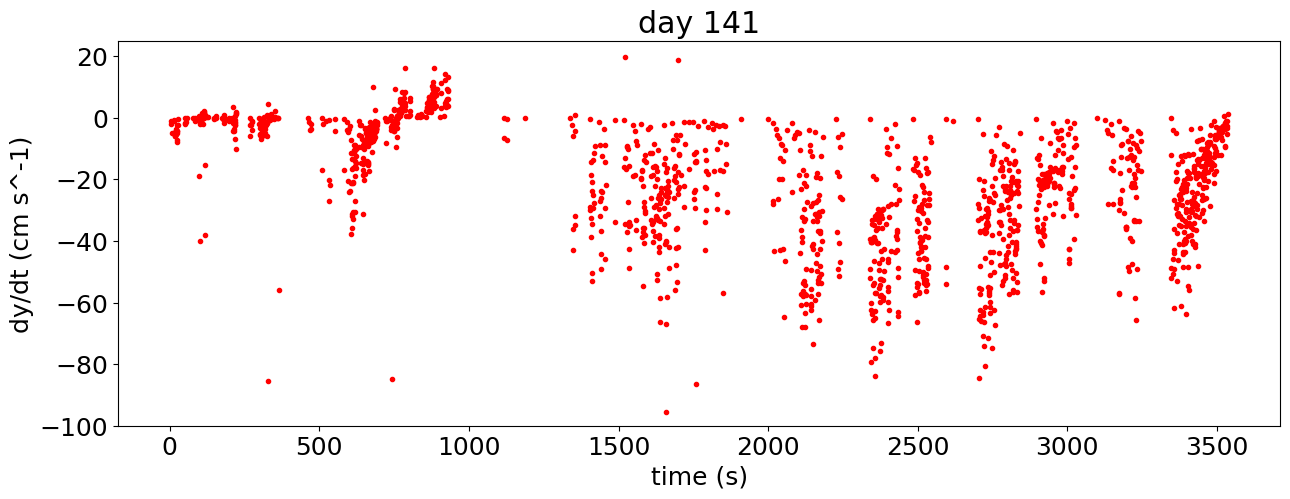

In [73]:
def plot_dydt(mod, data, ax):
    import obspy
    x = mod[0]
    y = mod[1]
    times = data.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)
    dt = times.diff().apply(lambda t: t.total_seconds())
    dy = y - data.depth.values

    ax.scatter(np.cumsum(dt), dy/dt, marker='.', color='red')

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-100, 25)
ax.set_ylabel('dy/dt (cm s^-1)')
ax.set_xlabel('time (s)')
ax.set_title('day 141')
plot_dydt(mod=xymod141, data=df141, ax=ax)


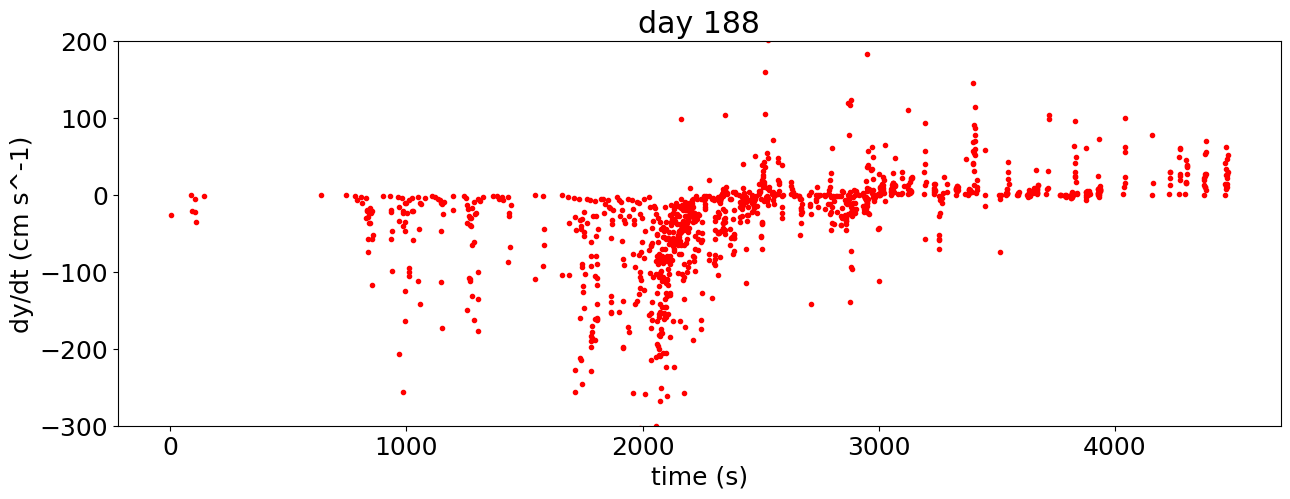

In [71]:
def plot_dydt(mod, data, ax):
    import obspy
    x = mod[0]
    y = mod[1]
    times = data.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)
    dt = times.diff().apply(lambda t: t.total_seconds())
    dy = y - data.depth.values

    ax.scatter(np.cumsum(dt), dy/dt, marker='.', color='red')

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-300, 200)
ax.set_ylabel('dy/dt (cm s^-1)')
ax.set_xlabel('time (s)')
ax.set_title('day 188')
plot_dydt(mod=xymod188, data=df188, ax=ax)


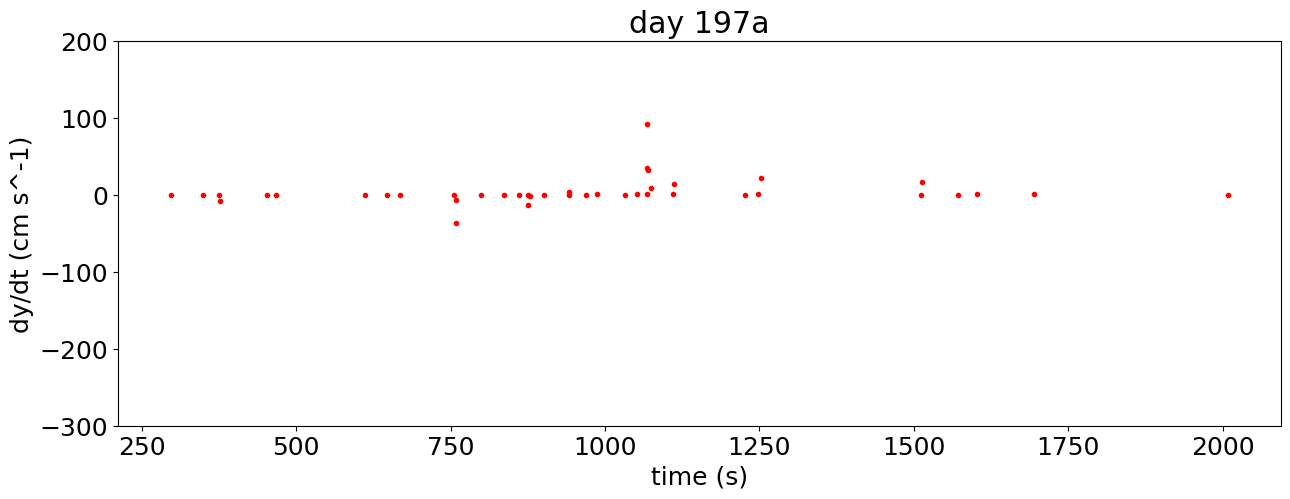

In [74]:
def plot_dydt(mod, data, ax):
    import obspy
    x = mod[0]
    y = mod[1]
    times = data.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)
    dt = times.diff().apply(lambda t: t.total_seconds())
    dy = y - data.depth.values

    ax.scatter(np.cumsum(dt), dy/dt, marker='.', color='red')

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-300, 200)
ax.set_ylabel('dy/dt (cm s^-1)')
ax.set_xlabel('time (s)')
ax.set_title('day 197a')
plot_dydt(mod=xymod197a, data=df197[:44], ax=ax)


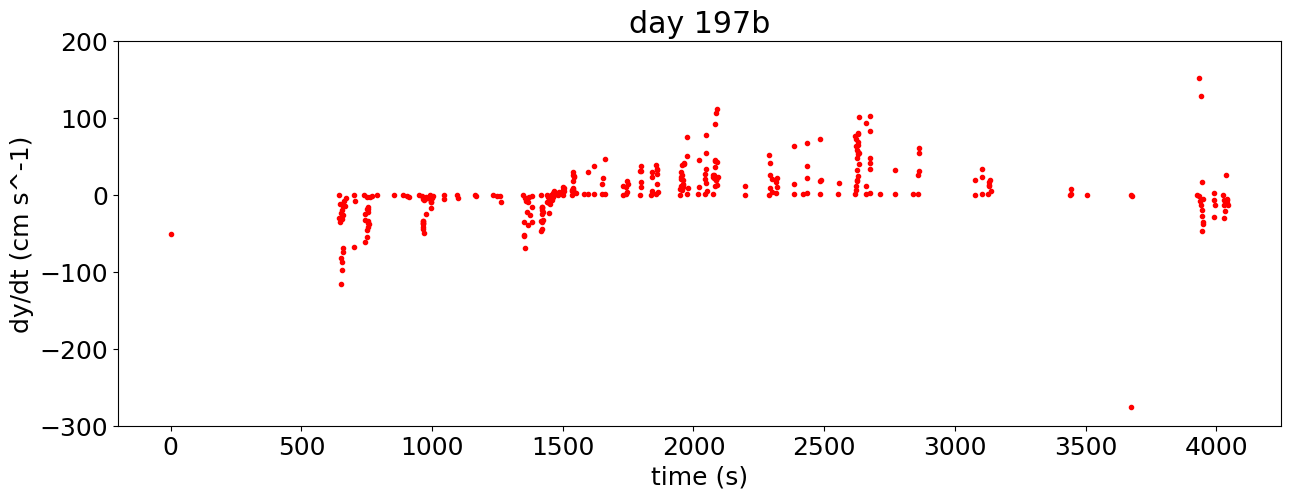

In [75]:
def plot_dydt(mod, data, ax):
    import obspy
    x = mod[0]
    y = mod[1]
    times = data.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)
    dt = times.diff().apply(lambda t: t.total_seconds())
    dy = y - data.depth.values

    ax.scatter(np.cumsum(dt), dy/dt, marker='.', color='red')

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-300, 200)
ax.set_ylabel('dy/dt (cm s^-1)')
ax.set_xlabel('time (s)')
ax.set_title('day 197b')
plot_dydt(mod=xymod197b, data=df197[44:], ax=ax)


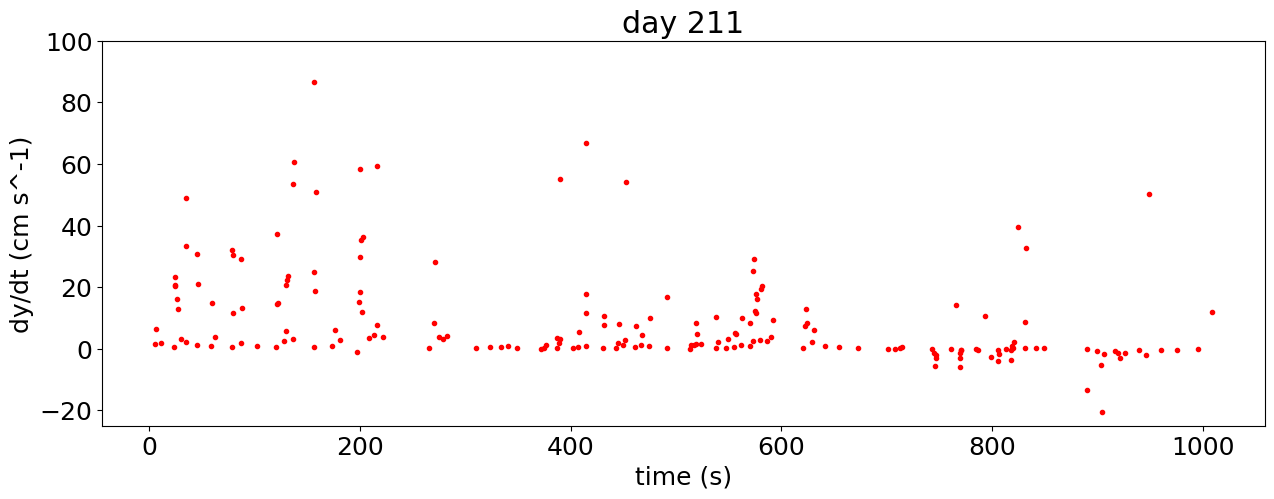

In [79]:
def plot_dydt(mod, data, ax):
    import obspy
    x = mod[0]
    y = mod[1]
    times = data.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)
    dt = times.diff().apply(lambda t: t.total_seconds())
    dy = y - data.depth.values

    ax.scatter(np.cumsum(dt), dy/dt, marker='.', color='red')

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-25, 100)
ax.set_ylabel('dy/dt (cm s^-1)')
ax.set_xlabel('time (s)')
ax.set_title('day 211')
plot_dydt(mod=xymod211, data=df211[20:], ax=ax)


Text(0.5, 1.0, 'day 211')

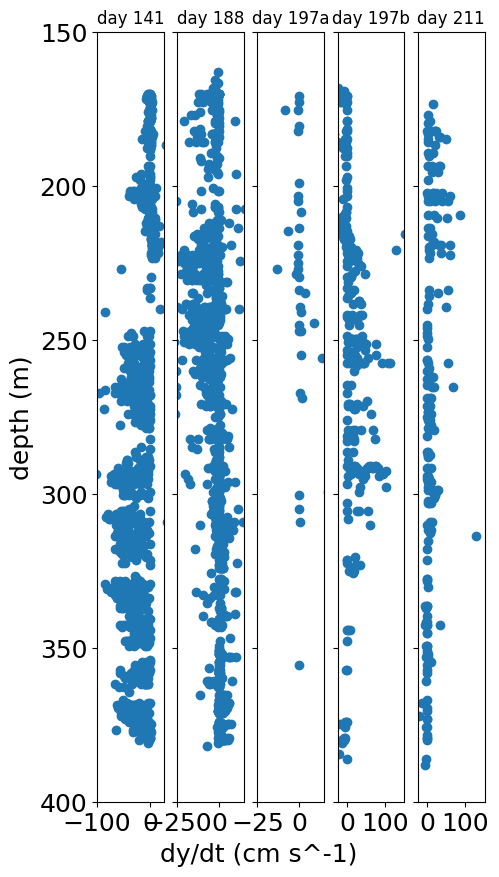

In [115]:

def calc_dydt(mod, data):
    x = mod[0]
    y = mod[1]
    times = data.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)
    dt = times.diff().apply(lambda t: t.total_seconds())
    dy = y - data.depth.values
    return dy, dt


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
fig, ax = plt.subplots(1, 5, figsize=(5, 10), sharey=True)

# fig2, ax2 = plt.subplots(figsize=(15, 5))

n = 6

dy, dt = calc_dydt(mod=xymod141, data=df141)
ax[0].set_xlim(-100, 25)
ax[0].set_ylim(400, 150)
ax[0].scatter(dy/dt, df141.depth)
ax2.plot(moving_average(a=df141.depth.values, n=n)
           ,moving_average(a=dy,n=n)
          )

dy, dt = calc_dydt(mod=xymod188, data=df188)
ax[1].scatter(dy/dt, df188.depth)
ax[1].set_xlim(-250, 150)
ax2.plot(moving_average(a=df188.depth.values, n=n)
           ,moving_average(a=dy,n=n)
          )

dy, dt = calc_dydt(mod=xymod197a, data=df197[:44])
ax[2].scatter(dy/dt, df197[:44].depth)
ax[2].set_xlim(-25, 15)
ax2.plot(moving_average(a=df197[:44].depth.values, n=n)
           ,moving_average(a=dy,n=n)
          )

dy, dt = calc_dydt(mod=xymod197b, data=df197[44:])
ax[3].scatter(dy/dt, df197[44:].depth)
ax[3].set_xlim(-25, 150)
ax2.plot(moving_average(a=df197[44:].depth.values, n=n)
           ,moving_average(a=dy,n=n)
          )

dy, dt = calc_dydt(mod=xymod211, data=df211[20:])
ax[4].scatter(dy/dt, df211[20:].depth)
ax[4].set_xlim(-25, 150)
ax2.plot(moving_average(a=df211[20:].depth.values, n=n)
           ,moving_average(a=dy,n=n)
          )



# def calc_rolling_dydx(dy, dx, n=3):
#     rolldy = moving_average(dy, n=n)
#     rolldx = moving_average(dx, n=n)
#     return roll

ax[0].set_ylabel('depth (m)')

fig.text(s='dy/dt (cm s^-1)', x=0.25, y=0.05)

ax[0].set_title('day 141', fontsize=12)
ax[1].set_title('day 188', fontsize=12)
ax[2].set_title('day 197a', fontsize=12)
ax[3].set_title('day 197b', fontsize=12)
ax[4].set_title('day 211', fontsize=12)

In [ ]:
dydt_df = pd.DataFrame()
dydt_df